In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, arctan2, exp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Sinusoids and Quadrature Signals 

* **AIS2201 - Signal Processing**
* **Week 34, 2024**
* **Lecturer: Kai Erik Hoff**

# Topics
* Intro to signal analysis
    - Time domain
    - Frequency domain
* Sinusoid properties
    - Frequency (angular/Hz)
    - Amplitude / Magnitude
    - Vector addition principle
    - Frequency mixing
* Sinusoids as basis for frequency analysis
* Complex exponentials
* Negative frequency and the two-sided frequency spectrum

## About Signals

<div width="100%">
    <img src="Figurer/03_Sinussignal/Fig1_signaleksempel.png" align="right" width="35%"/>
    <div style="width: 55%">
    <br>
    <ul>
      <li>A <i>signal</i> can be described as some measurable quantity carrying information. </li>
      <ul><li>DSP systems typically use electrical signals.</li>
          <li>Can be voltage output from sensors, antennas etc.</li></ul>
      <li>1-Dimensional signals of primary concern for this course</li>
      <ul><li>Eg. time-varying voltage signal.</li>
      <li>Sound, IMU measurements, EMG etc.</li></ul>
      <li>Multidimensional signals can also occur.</li>
      <ul><li>Images are considered to be 2-dimensional. Signal value (color) varies with both $x$- and $y$ coordinates.</li>
      <li>Video counts as a 3-dimensional signal, where time is an additional variable compared to images.</li></ul>
    </ul>  
    </div>
</div> 

<br>
<br>


# Signal analysis

* Signal Processing Theory provides a number of tools for analyzing signals.
* Based on inspecting signal properties in the *time domain* or the *frequency domain*.

### Time domain
* 1 second window of an EKG-signal.

<img src="Figurer/03_Sinussignal/Fig5_EKG.png" align="center" width= "40%" />

### Frequency domain
* EKG signal frequency spectrum.

<img src="Figurer/03_Sinussignal/EKG_Spectrum.png" align="center" width= "60%" />

## What is the frequency spectrum?


* A function $X(f)$ which represents the decomposition of a time-domain signal $x(t)$ into constituent sine waves / sinusoids.
* Graphical representation:

<img src="Figurer/03_Sinussignal/Fig6_EKG_decomp.png" width="100%" />


# Displaying the frequency spectrum using Python

-0.017109642338161535 0.0


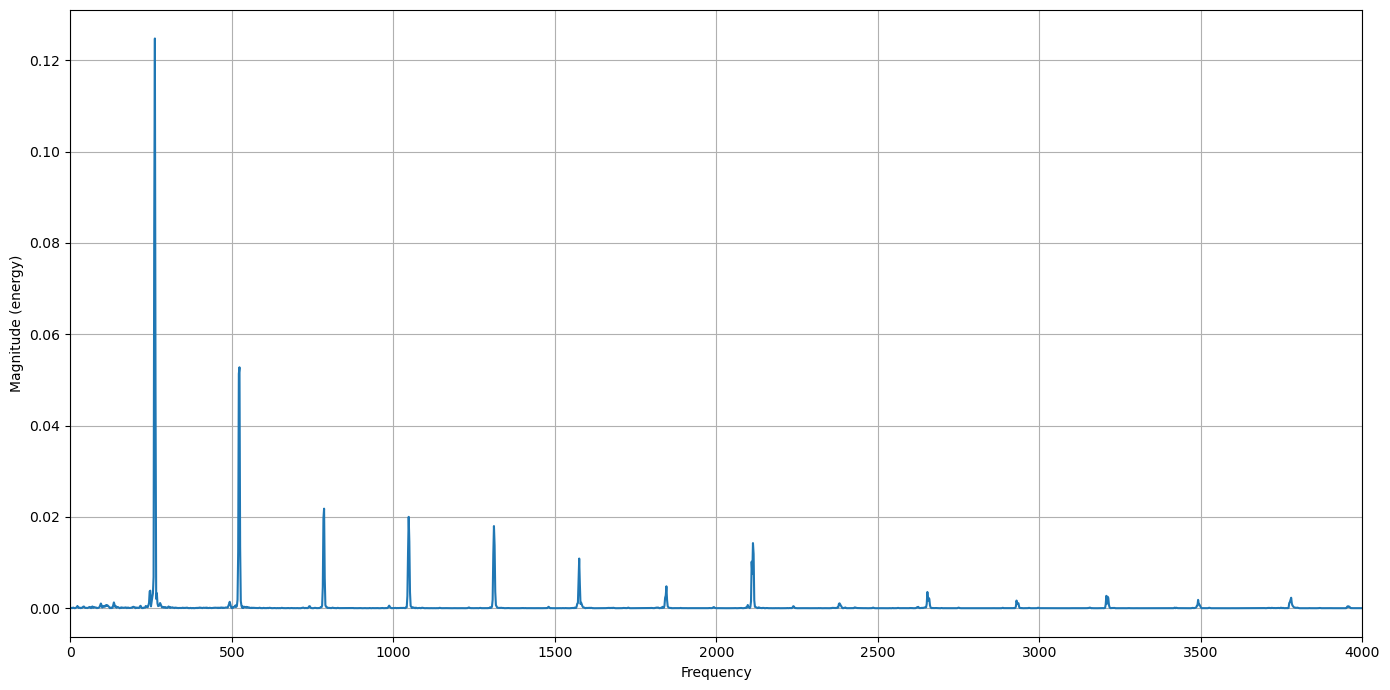

In [2]:
from scipy.io import wavfile
from IPython.display import Audio
fs, sampleData = wavfile.read("Datafiler/03_Sinussignal/piano.wav") # Load audio file
x = sampleData/max(abs(sampleData)) # Normaliser til -1 < x[n] < 1 og konverter til flyttall 

y = x.copy()
y[0] = 0
print(x[0], y[0])

%matplotlib inline
plt.figure(figsize=(14,7))
plt.magnitude_spectrum(x, fs)
plt.xlim([0, 4000])
Audio(sampleData, rate = fs)

## Sinusuoids - *the basis for all freqency analysis*
* Pure waves - frequency spectrum is a single spike.
* Mathematical expresssion
$$x(t) = A\cdot \cos\left(\omega\cdot t + \phi \right)$$
    - $A$ is the sinusoid's *Amplitude*
    - $\omega$ is the sinusoid's *angular frequency* (rad/s:)
    - Frequency $f$ can also be a measurement of cycles per second ($Hz$)
        - $\omega = 2\pi \cdot f \leftrightarrow f = \frac{\omega}{2\pi}$
    - $\phi$ is the sinusoid's *phase* *fase*
      - Unit: radians ($\text{rad}$) or degrees ($^{\circ}$)

<img src="Figurer/03_Sinussignal/Fig2_sinusbølge.png" width="80%" />


## Important distinctions in terminology

### Amplitude vs. Magnitude

* **Magnitude** is a measure of the strength of a sinusiod's oscillations and is always positive.
* **Amplitude** is a mathematical variable in a function expression and can be positive, negative or even complex valued.

$$ \text{Magnitude} =\boldsymbol{\big|} \text{Amplitude} \boldsymbol{\big|}$$

## Sinusoids vs. trigonometric functions

* A **Sinusoid**  is *any* signal $x(t)$ which can be expressed as using a sine/cosine function: $x(t) = A\cdot \cos(\omega \cdot t + \phi)$.
* If we are specifically referencing strictly cosine ($A \cdot \cos(\omega \cdot t)$) or sine ($A \cdot \sin(\omega \cdot t)$) terms, we will use the term *cosine function* or *sine function*


* Important note: The only difference between a sine function and a cosine function is a $\frac{\pi}{2} \text{ rad}$ or $90^{\circ}$ phase shift:
$$\sin(\omega \cdot t) = \cos \left( \omega \cdot t - \frac{\pi}{2} \right) $$

## Python-demo: *sinusoid* 
$$x(t) = A\cdot \cos(2\pi \cdot f \cdot t + \phi )$$

Output()

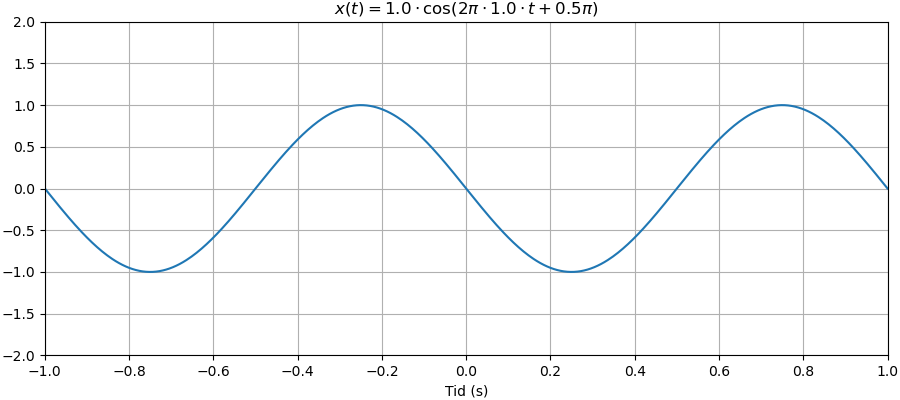

In [3]:
%matplotlib ipympl
from Kildekode._03_Sinussignal import SineWaveDemo
SineWaveDemo(2, fig_size=(9,4));

## Why sinusoids?

* Sinusoids not the only function which can be used to decompose signals.
* Wouldn't a square wave be simpler?

* Sinusoids have some special properties which make them uniquely useful when analyzing linear systems

## Differentiation of sinusoids

* The derivative of a sinusoid is another sinusoid

$$\begin{align}
\frac{d}{dt} \left(A\cdot \cos (\omega \cdot t) \right) &= A \cdot -\sin( \omega \cdot t) \cdot \omega & \text{(kernel rule)} \\
&= A \cdot \omega \cdot \cos \left(\omega \cdot t + \frac{\pi}{2} \right) & 
\end{align}$$



Text(0.5, 1.0, "A sinusoid and it's derivative")

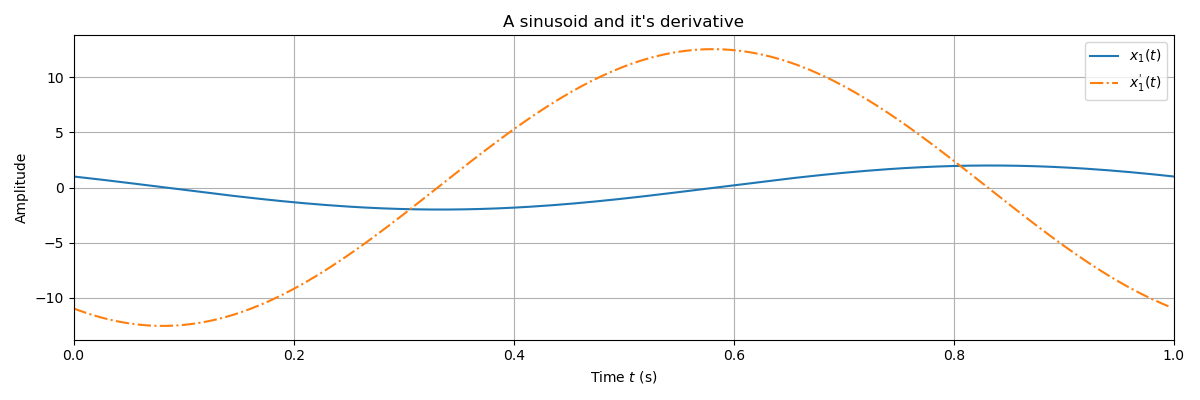

In [8]:
import numpy as np
from numpy import cos, sin, pi
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 201)
x1 = 2*cos(2*pi*t + pi/3)

x2 = np.diff(x1)/np.diff(t) # Numerical differentiation

plt.close(3), plt.figure(3, figsize=(12,4))
plt.plot(t, x1, label = "$x_1(t)$")
plt.plot(t[:-1], x2, "-.", label = "$x_1^'(t)$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Amplitude")
plt.title("A sinusoid and it's derivative")

* Differentiation causes a change in magnitude and phase, but retains the same shape.

## Adding sinusoids

* When two sinusoids of equal frequency are added together, the result is another sinusoid.


Text(0.5, 1.0, 'Two sinusoids and their sum')

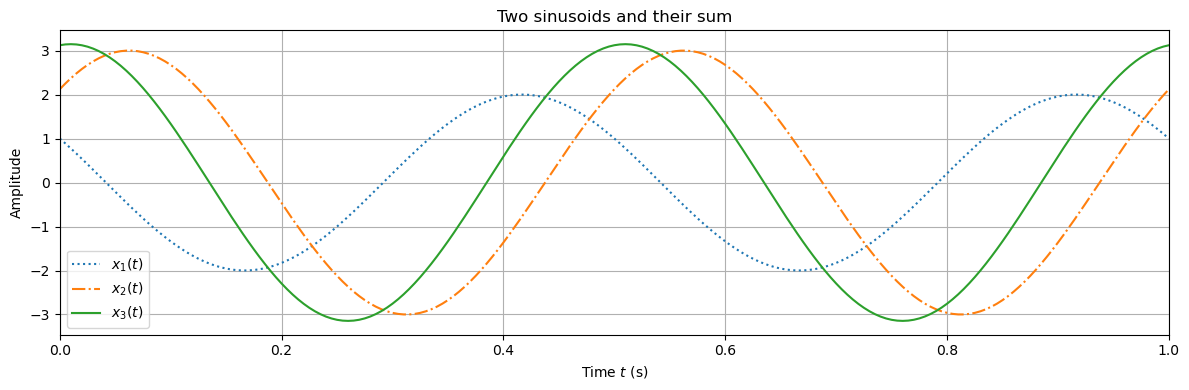

In [10]:
import numpy as np
from numpy import cos, sin, pi
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0, 1, 201)
x1 = 2*cos(4*pi*t + pi/3)
x2 = 3*cos(4*pi*t - pi/4)
x3 = x1 + x2

plt.close(4), plt.figure(4, figsize=(12,4))
plt.plot(t, x1, ":", label = "$x_1(t)$")
plt.plot(t, x2, "-.", label = "$x_2(t)$")
plt.plot(t, x3, label = "$x_3(t)$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Amplitude")
plt.title("Two sinusoids and their sum")

## Vector addition principle

* Given a sum of sinusoids:
#### $$\sum_{k=1}^{N}A_k \cdot \cos\left(\omega_0 \cdot t + \phi_k \right) = A\cdot \cos \left(\omega_0 \cdot t + \phi \right)$$

* The amplitude $A$ and phase $\phi$ for the resulting sinusoid can be found through vector addition.
    * Represent each component sinusoid as a complex vector (or phasor) $\boldsymbol{A_i} = A_i \cdot e^{j\phi_i}$
    * The sum of all component phasors $\boldsymbol{A}_i$ is the phasor for the sum of all sinusoids.
    
$$A = \left|A_1e^{j\phi_1} + A_2e^{j\phi_2}+\cdots\right|$$
$$\phi = \angle \left( A_1e^{j\phi_1} + A_2e^{j\phi_2}+\cdots\right) $$

## Demo: *vector addition principle*

Output()

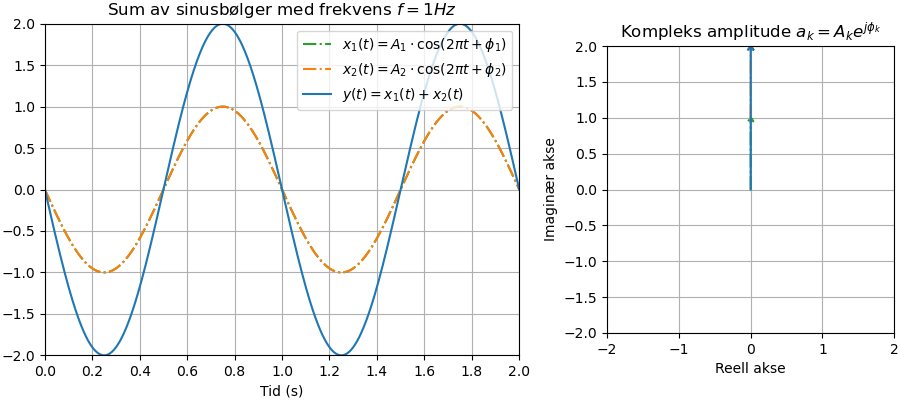

In [11]:
%matplotlib ipympl
from Kildekode._03_Sinussignal import VectorSumDemo
VectorSumDemo(5);

## Example: circuit analysis

* Given a series RL circuit as shown with current $i(t) = \cos(100 \cdot t)$, what is the voltage $v_1(t)$?

<img src="Figurer/03_Sinussignal/RLC.png" width="80%" />

$$\begin{align}
v_C(t) &= \frac{1}{C}\int_0^t i(\tau) d\tau\\
 &= \frac{1}{C}\int_0^t \cos(2\pi \cdot 50 \cdot \tau)d\tau\\
 &= \frac{1}{C}\cdot \sin(2\pi \cdot 50 \cdot t)\cdot \frac{1}{100\pi}\\
 &= \frac{1}{C}\cdot \cos\left(2\pi \cdot 50 \cdot t - \frac{\pi}{2}\right)\cdot \frac{1}{100\pi}\\ \\ 
v_R(t) &= R \cdot i(t)\\
&= R \cdot \cos(2\pi \cdot 50 \cdot t) \\ \\
v_1(t) &= v_R(t) + v_C(t) \\
&= R \cdot \cos(2\pi \cdot 50 \cdot t) + \frac{1}{C\cdot 100\pi}\cdot \cos\left(2\pi \cdot 50 \cdot t - \frac{\pi}{2}\right)
\end{align}$$

# Calculating the frequency spectrum of a signal

* Accomplished by using the Fourier Transform:
$$\begin{align}
X(\omega) &= \int_{-\infty}^{\infty} x(t) \cdot e^{-j\cdot \omega \cdot t} dt\\
&= \int_{-\infty}^{\infty}x(t) \cdot \cos( \omega \cdot t) dt - j \cdot \int_{-\infty}^{\infty}x(t) \cdot \sin( \omega \cdot t) dt
\end{align}$$

* Fair enough, but what's actually going on here?

* First off, let's start by studying the more approachable *fourier series decomposition* formula:

$$ \boldsymbol{a}_k = \frac{1}{T}\int_0^T x(t)\cdot \left( \cos\left(2\pi \cdot \frac{k}{T} \cdot t \right) - j \sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) \right) dt$$

* Let's focus on what happens when we multiply a signal $x(t)$ with a sinusoid.

<img src="Figurer/03_Sinussignal/waveform.png" width="70%" />

#  Frequency mixing

* Term for multiplying a signal with a sinusoid
* Multiplying two sinusoids will create a new signal with different frequency composition
    * This composition can be found using a well known trigonometric idenity:
    
    $$ \cos(a)\cdot \cos(b) = \frac{1}{2} \cdot \cos(a-b) + \frac{1}{2} \cdot \cos(a+b)$$<br>
    
    * Substing $a$ with $2\pi \cdot f_1 \cdot t$ and $b$ with $2\pi \cdot f_2 \cdot t$ gives:

    $$ \cos\left( 2\pi f_1 \cdot t \right) \cdot \cos\left( 2\pi f_2 \cdot t \right) = \frac{1}{2}\cos\left(2\pi (f_1 - f_2) \cdot t \right) + \frac{1}{2}\cos\left(2\pi (f_1 + f_2) \cdot t \right)$$<br>
    
* The product of two sinusoids is the sum of two new sinusoids, with frequencies $f_1-f_2$ og $f_1+f2$

## Demo: *frequency mixing*

Output()

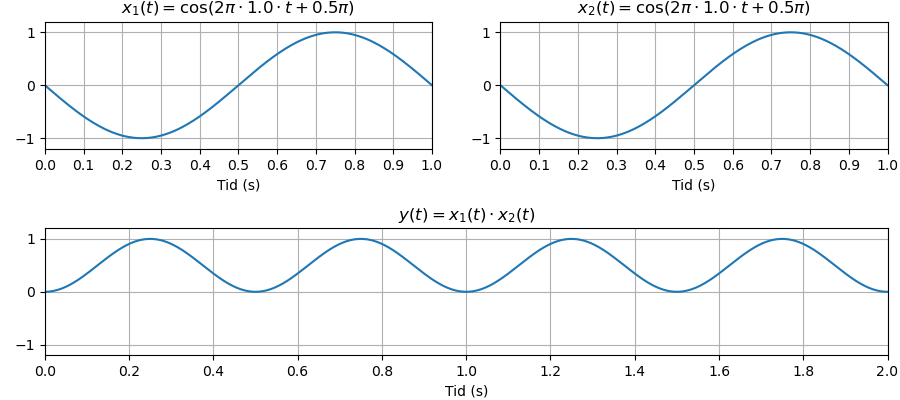

In [13]:
%matplotlib ipympl 
from Kildekode._03_Sinussignal import FrequencyMixingDemo
FrequencyMixingDemo(6, fig_size=(9, 4));

## Frequency mixing of "unknown" sinusoid $x(t)$

In [14]:
import numpy as np

random_mag, random_phase = np.random.rand(2)*np.array([10, 2*np.pi])
t = np.linspace(0, 1, 201)
f = 5
x = random_mag*np.cos(2*np.pi*f*t+ random_mag)

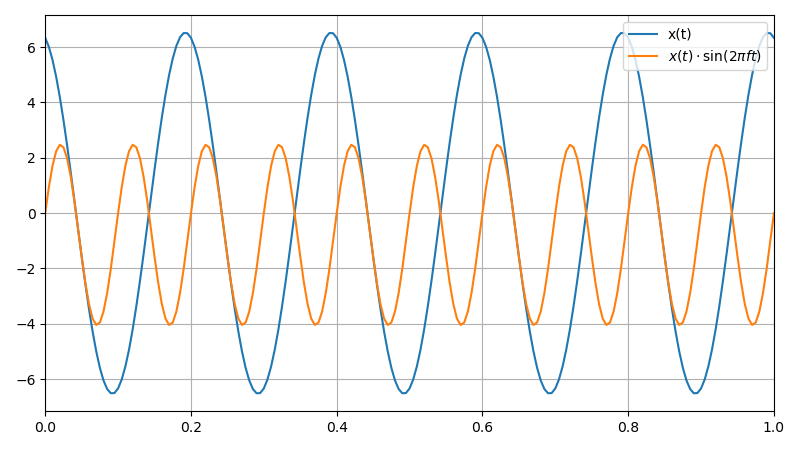

In [16]:
plt.close(7), plt.figure(7)
plt.plot(t, x, label="x(t)")
plt.plot(t, x*np.sin(2*np.pi*f*t), label="$x(t)\\cdot \\sin(2\\pi f t)$")
plt.legend(loc="upper right")

## Interesting fact about radio systems

* Frequency mixing is an essential component of all radio communication.
    * Allows electronic systems to "move" the frequency content of a baseband signal such as audio far into the radio frequency spectrum
 
* The science of shaping a high-frequency carrier wave to contain a signal is referred to as *modulation*

* Simplest form of modulation is Amplitude Modulation (AM)

# Integration = extracting constant term

$$\int_0^T \frac{A}{2} + \frac{A}{2}\cos(2\pi \cdot 2f \cdot t) dt  = \frac{A}{2}$$

* The constant term in $x(t)\cdot \cos(\omega\cdot t)$ is proportional to the magnitude of the $\cos(\omega\cdot t)$ term in $x(t)$
    * Constant term = signal mean: $\frac{1}{T}\int_0^{T} x(t) \cdot \cos(2\pi \cdot f \cdot t) dt$
* The constant term in $x(t)\cdot \sin(\omega\cdot t)$ is proportional to the magnitude of the $\sin(\omega\cdot t)$ term in $x(t)$
    * Constant term = signal mean: $\frac{1}{T}\int_0^{T} x(t) \cdot \sin(2\pi \cdot f \cdot t) dt$ 

(-6.8666338623462675, 6.8666338623462675)

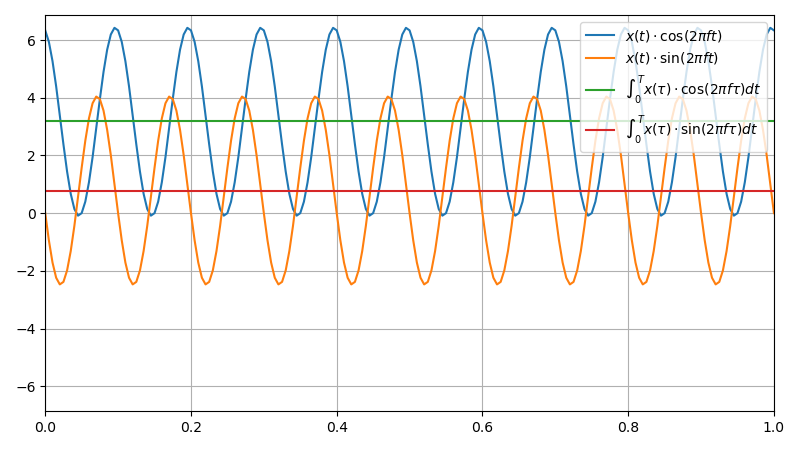

In [21]:
plt.close(8);plt.figure(8)
x_mixed = x*np.cos(2*np.pi*f*t)
x_mixed_sine = x*-np.sin(2*np.pi*f*t)
A_half = np.mean(x_mixed)
Ay_half = np.mean(x_mixed_sine)
plt.plot(t, x*np.cos(2*np.pi*f*t), label="$x(t)\\cdot \\cos(2\\pi f t)$")
plt.plot(t, x*-np.sin(2*np.pi*f*t), label="$x(t)\\cdot \\sin(2\\pi f t)$")
plt.plot([t[0], t[-1]], A_half*np.ones(2), label = "$\\int_0^T x(\\tau)\\cdot \\cos(2\\pi f \\tau)dt$")
plt.plot([t[0], t[-1]], Ay_half*np.ones(2), label = "$\\int_0^T x(\\tau)\\cdot \\sin(2\\pi f \\tau)dt$")
plt.legend(loc="upper right")
plt.ylim(np.array([-1, 1])*plt.gca().get_ylim()[1])

* All other wave components with frequencies other than the mixing frquency $f$ are cancelled out by integration

# Complex frequency mixing

* As we have seen, the results from mixing with both a sine wave and cosine wave must be combined to gain an accurate measure of a frequency component's magnitude $A$ and phase $\phi$

* Combining these in the complex plane leads to..

$$\begin{align}
\boldsymbol{a}_k &= \frac{1}{T}\int_0^T x(t)\cdot \cos\left(2\pi \cdot \frac{k}{T} \cdot t\right) dt  - \frac{j}{T}\int_0^T\sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) dt \\
&=\frac{1}{T}\int_0^T x(t)\cdot \left( \cos\left(2\pi \cdot \frac{k}{T} \cdot t \right) - j \sin\left(2\pi \cdot \frac{k}{T}  \cdot t\right) \right) dt\\
&=\frac{1}{T}\int_0^T x(t)\cdot e^{-j 2\pi \frac{k}{T}t} dt\end{align}$$

* Takeaway: the signal is mixed with a *complex exponential*

## Komplex exponentials (quadrature signals)
## $$e^{j\omega t} = \cos(\omega t) + j\sin(\omega t)$$
    
    
    
<div style="width: 100%;">
    <img src="Figurer/03_Sinussignal/Fig18_compRot.jpg" align="right" width="40%" />
    <div style="width: 60%">
    <ul>
        <br>
      <li>Visualized as a rotating phasor</li>
      <ul><li>Constant lenght</li>
          <li>Angle $\theta$ varies as a function of time $t$ </li>
          $$\theta = \omega\cdot t$$ 
          <li>Angular frequency $\omega$ determines <i>rotation speed</i>.
        </ul>
    </ul>  
    </div>
</div> 

## Negative frequency

* A rotating phasor has a *direction* as well as a *rotation frequency*
    * Frequencies can be *negative*
    * Cunter-clockwise rotation = *positive* frequency
    * Clockwise rotation = *negative* frequency
<!--
* Matematisk frekensanalyse bryter opp signaler i komplekse eksponentialer.
* Frekvensen til komplekse eksponentialer avgjør hastigheten på den komplekse vektorenes rotasjon.
    - Denne rotasjonen har en *retning*.
    - Vektorer som roterer *mot* klokken har *positiv* frekvens.
    - Vektorer som roterer *med* klokken har *negativ* frekvens.
* I Signalbehandling har frekvens altså en *retning*. Og negative frekvenser er dermed, rent matematisk, noe som eksisterer.
* Et sinussignal med frekvens $100Hz$, kan dermed sies å ha frekvensinnhold to frekvenser: $f = \pm 100Hz$.
-->

# Complex functions in Python

* In python, `j` is used as a complex unit vector.
    * Dependent on a mumerical magnitude as prefix. (eks.: `z = 1j`) 
* The `numpy` module has a number of functions for complex values: `abs()`, `angle()`, `real()` og `imag()`.
* Other useful trigonometric functions in `numpy`: `cos()`, `sin()`, `hypot()`, `arctan2()` og `exp()`.

In [30]:
z = 1 + 2j
length = np.abs(z)
angle = np.angle(z)
length, np.rad2deg(angle)

(2.23606797749979, 63.43494882292201)

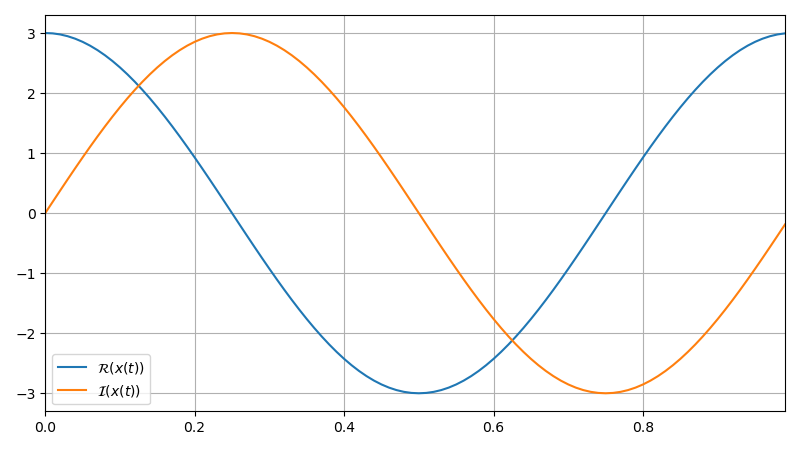

In [23]:
A = 3
f = 2
T = 1
fs = 100
t = np.linspace(0, T, T*fs, endpoint=False)
x = A*exp(2j*pi*t)
plt.close(10);plt.figure(10)
plt.plot(t, np.real(x), label=r"$\mathcal{R}(x(t))$")
plt.plot(t, np.imag(x), label=r"$\mathcal{I}(x(t))$")
plt.legend()

## Sinusoids and coplex exponentials

<img src="Figurer/03_Sinussignal/Fig18_rePhasor.gif" align="right" width="20%" />

<br>
<br>

* A cosine function is the real part of a complex exponential.
$$\cos(\omega t) = \mathfrak{R}e\left(e^{j\omega t}\right)$$
* A sine function is the imaginary part of a complex exponential.
$$\sin(\omega t) = \mathfrak{I}m\left(e^{j\omega t}\right)$$



## Sinusoids as a sum of complex exponentials

<div style="width: 90%;">
    <img src="Figurer/03_Sinussignal/Fig19_phasorSum.gif" align="right" width="25%" />
    <div style="width: 60%">
    <ul>
      <br>
      <li>A sinusoid can be decomposed into a sum of rotating phasors:</li>
        $$\cos(\omega t) = \frac{e^{j\omega t}+e^{-j\omega t}}{2}$$
        $$\sin(\omega t) = \frac{e^{j\omega t}-e^{-j\omega t}}{2j}$$
        <li><b><u>Eulers formula</u></b></li>
        <br>
        <li><i>In it's general form, the fourier transform decomposes a signal into <b>complex exponential functions</b></i></li>
       </ul>  
    </div>
</div> 

## Alternate visual representation

<img src="Figurer/04_Frekvensrepresentasjon/Fig5-4_Euler3D.png" style="width: 65%; margin-left: 100px" />

## Two-sided sinusoid frequency spectrum
<!---
<br>

<img src="Figurer/03_Sinussignal/Fig20_sineSpect.png" style="width: 100%" />

<br>

* Legg merke til at hver av frekvenskomponentene har halve amplituden til sinusbølgen.-->

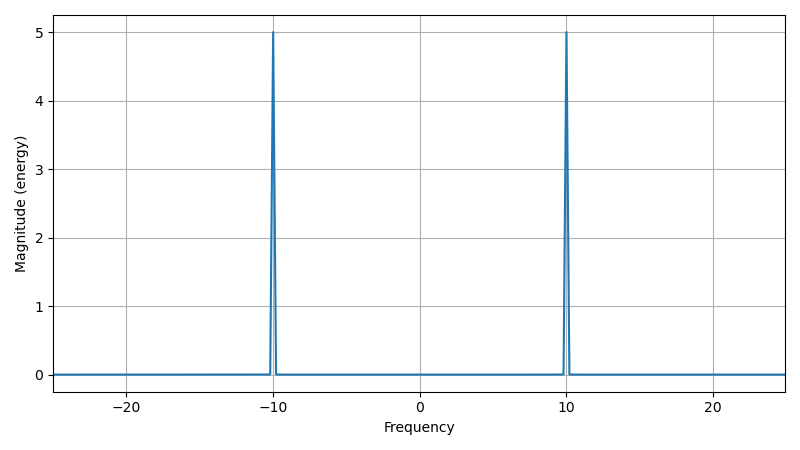

In [33]:
import numpy as np
import matplotlib.pyplot as plt
T = 10
mag = 10
t = np.linspace(0, T, 500, endpoint=False)
x = mag*np.cos(2*pi*10*t)
plt.figure()
plt.magnitude_spectrum(x, Fs=500/T, sides="twosided");

* Note how each spike is half the magnitude of the sinusoid's magnitude.

## Demo: frequency mixing in the frequency domain

Output()

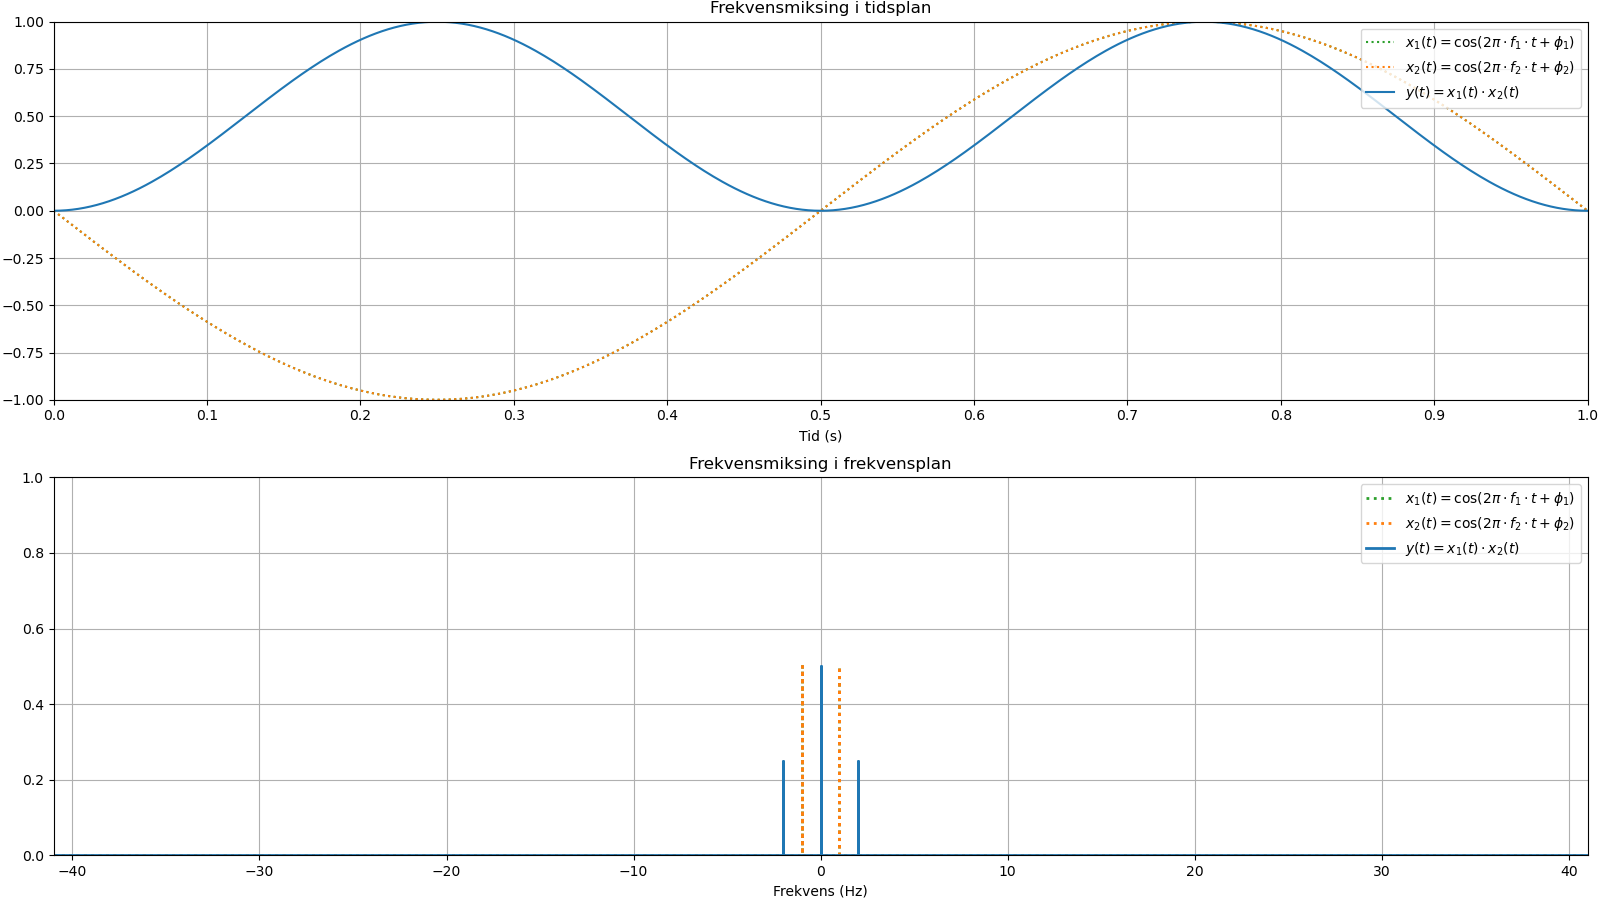

In [34]:
%matplotlib ipympl
from Kildekode._04_Frekvensrepresentasjon import FrequencyMixingDemo
FrequencyMixingDemo(fig_num=2, figsize=(16,9));

## Math example:
* Use **Eulers Formula** to calculate the result of the following complex frequency mixing:
$$2 \cos(100\cdot t) \cdot e^{-j100 \cdot t}$$

# Complex frequency mixing in the frequency domain

* Multiplying **any** signal $x(t)$ by a complex exponential $e^{j2\pi f t}$ produces a *shift* in the entire frequency spectrum of $x(t)$

$$\begin{align}
y(t) &= x(t) \cdot e^{j2\pi f_0 t} \\
&\downarrow \\
Y(f) &= X(f+f_0)
\end{align}$$

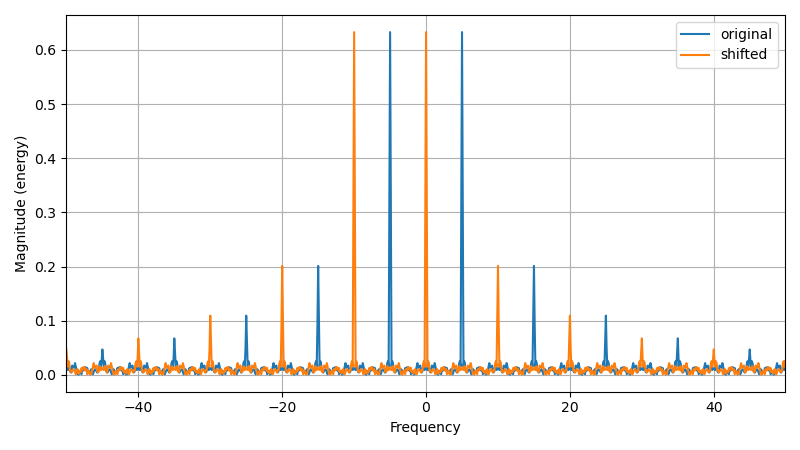

In [39]:
from scipy.signal import square
T = 10
f = 5
f_mixing = -5
t = np.linspace(0, T, 1000, endpoint=False)
x = square(2*np.pi*f*t)
plt.close(10);plt.figure(10)
plt.magnitude_spectrum(x, Fs = 1000/T, sides="twosided", label = "original");
plt.magnitude_spectrum(x*np.exp(2j*pi*f_mixing*t), Fs=1000/T, sides="twosided", label="shifted");
plt.legend(loc="upper right")

## Fourier analysis of signal visualized
![](Figurer/03_Sinussignal/Kompleks_frekvensmiksing.gif)

# Summary of main points:
* Sinusoids are a broad term covering al sinewave-shaped functions
* All signals can be expressed as a sum$^*$ of sinusoids with different frequency, amplitude and phase
* Single frequency components are extracted by *mixing* a signal with the pure tone we wish to identify
    * Need to combine both sine and cosine mixing tones
    * Resulting operation equates mutliplying signal by a complex exponential
* Sinusoids are expressed as the sum of two conter-rotating complex exponentials
    * In the two-sided frequency domain, they have both a *positive* and a *negative* frequency component
* A two-sided frequency spectrum is the "true" representation of the output from the *generalized fourier transform*
    * Not commonly used due to symmetry properties.
    * Essential for analyzing *complex signals*

$^*$For non-repeating signals, the analysis window becomes infinately long, and we get the general fourier tranform. Here, the signal reconstruction is expressed by integratin rather than a sum.

# Questions?